In [1]:
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 400

In [2]:
with open('../data/series.json') as f:
    series = json.load(f)

In [3]:
df = pd.read_csv('../data/data.csv')

df = df[df['year'] == 2020]
df = df.drop('year', axis=1)
df = df.drop('country', axis=1)

df.head()

GC.TAX.OTHR.RV.ZS  FD.RES.LIQU.AS.ZS  IC.EXP.TMBC  SE.TER.ENRR  \
60                 NaN                NaN          NaN          NaN   
122           0.097806          18.566681          NaN      9.55310   
184                NaN          86.887467          NaN     10.56252   
246                NaN          15.987375          NaN     10.23192   
308                NaN          35.071193          NaN          NaN   

     SH.H2O.SMDW.ZS  NY.ADJ.DFOR.GN.ZS  SE.PRM.GINT.FE.ZS  NE.CON.PRVT.CN.AD  \
60              NaN                NaN                NaN       2.955892e+09   
122             NaN           2.004003                NaN                NaN   
184       27.588956           0.308254                NaN                NaN   
246       24.014995           0.988444                NaN                NaN   
308             NaN           0.773304                NaN       1.771189e+13   

     NV.IND.TOTL.KN  AG.PRD.FOOD.XD  ...  NY.TRF.NCTR.CD  IS.RRS.PASG.KM  \
60              NaN             NaN  ...   -4.776536e+07             NaN   
122             NaN             NaN  ...             NaN             NaN   
184    1.552566e+11          118.04  ...    9.046521e+09             NaN   
246             NaN             NaN  ...             NaN             NaN   
308    7.364557e+11          108.08  ...   -5.746209e+07             NaN   

     IQ.SCI.SRCE  SL.UEM.TOTL.FE.ZS  SP.POP.0014.TO.ZS  TX.VAL.MANF.ZS.UN  \
60           NaN                NaN          17.351022          40.146169   
122    50.000000           8.120844          41.598115          28.449319   
184    40.000000          16.783001          43.807912                NaN   
246    51.428571           4.808800          43.319347           9.926337   
308    30.000000           9.896000          45.306602           0.932894   

     DT.TDS.DIMF.CD  SP.POP.5559.MA.5Y  DC.DAC.FRAL.CD  SE.ENR.SECO.FM.ZS  
60              NaN           8.184462             NaN                NaN  
122             NaN           2.145886             NaN            0.89346  
184       9823909.6           1.761617    7.340000e+06                NaN  
246             NaN           2.162499             NaN                NaN  
308      22928492.4           2.112366    1.084000e+07                NaN  

[5 rows x 1442 columns]

In [4]:
df.isna().all()

GC.TAX.OTHR.RV.ZS    False
FD.RES.LIQU.AS.ZS    False
IC.EXP.TMBC           True
SE.TER.ENRR          False
SH.H2O.SMDW.ZS       False
                     ...  
TX.VAL.MANF.ZS.UN    False
DT.TDS.DIMF.CD       False
SP.POP.5559.MA.5Y    False
DC.DAC.FRAL.CD       False
SE.ENR.SECO.FM.ZS    False
Length: 1442, dtype: bool

In [5]:
nan_cols = df.columns[df.isna().all()]
df = df.drop(nan_cols, axis=1)

In [6]:
df.head()

GC.TAX.OTHR.RV.ZS  FD.RES.LIQU.AS.ZS  SE.TER.ENRR  SH.H2O.SMDW.ZS  \
60                 NaN                NaN          NaN             NaN   
122           0.097806          18.566681      9.55310             NaN   
184                NaN          86.887467     10.56252       27.588956   
246                NaN          15.987375     10.23192       24.014995   
308                NaN          35.071193          NaN             NaN   

     NY.ADJ.DFOR.GN.ZS  NE.CON.PRVT.CN.AD  NV.IND.TOTL.KN  AG.PRD.FOOD.XD  \
60                 NaN       2.955892e+09             NaN             NaN   
122           2.004003                NaN             NaN             NaN   
184           0.308254                NaN    1.552566e+11          118.04   
246           0.988444                NaN             NaN             NaN   
308           0.773304       1.771189e+13    7.364557e+11          108.08   

     TM.TAX.MANF.IP.ZS  SH.STA.OWGH.MA.ZS  ...  NY.TRF.NCTR.CD  \
60                 NaN                NaN  ...   -4.776536e+07   
122                NaN                NaN  ...             NaN   
184                NaN                NaN  ...    9.046521e+09   
246                NaN                NaN  ...             NaN   
308           20.74474                NaN  ...   -5.746209e+07   

     IS.RRS.PASG.KM  IQ.SCI.SRCE  SL.UEM.TOTL.FE.ZS  SP.POP.0014.TO.ZS  \
60              NaN          NaN                NaN          17.351022   
122             NaN    50.000000           8.120844          41.598115   
184             NaN    40.000000          16.783001          43.807912   
246             NaN    51.428571           4.808800          43.319347   
308             NaN    30.000000           9.896000          45.306602   

     TX.VAL.MANF.ZS.UN  DT.TDS.DIMF.CD  SP.POP.5559.MA.5Y  DC.DAC.FRAL.CD  \
60           40.146169             NaN           8.184462             NaN   
122          28.449319             NaN           2.145886             NaN   
184                NaN       9823909.6           1.761617    7.340000e+06   
246           9.926337             NaN           2.162499             NaN   
308           0.932894      22928492.4           2.112366    1.084000e+07   

     SE.ENR.SECO.FM.ZS  
60                 NaN  
122            0.89346  
184                NaN  
246                NaN  
308                NaN  

[5 rows x 1073 columns]

In [7]:
corr = df.corr()

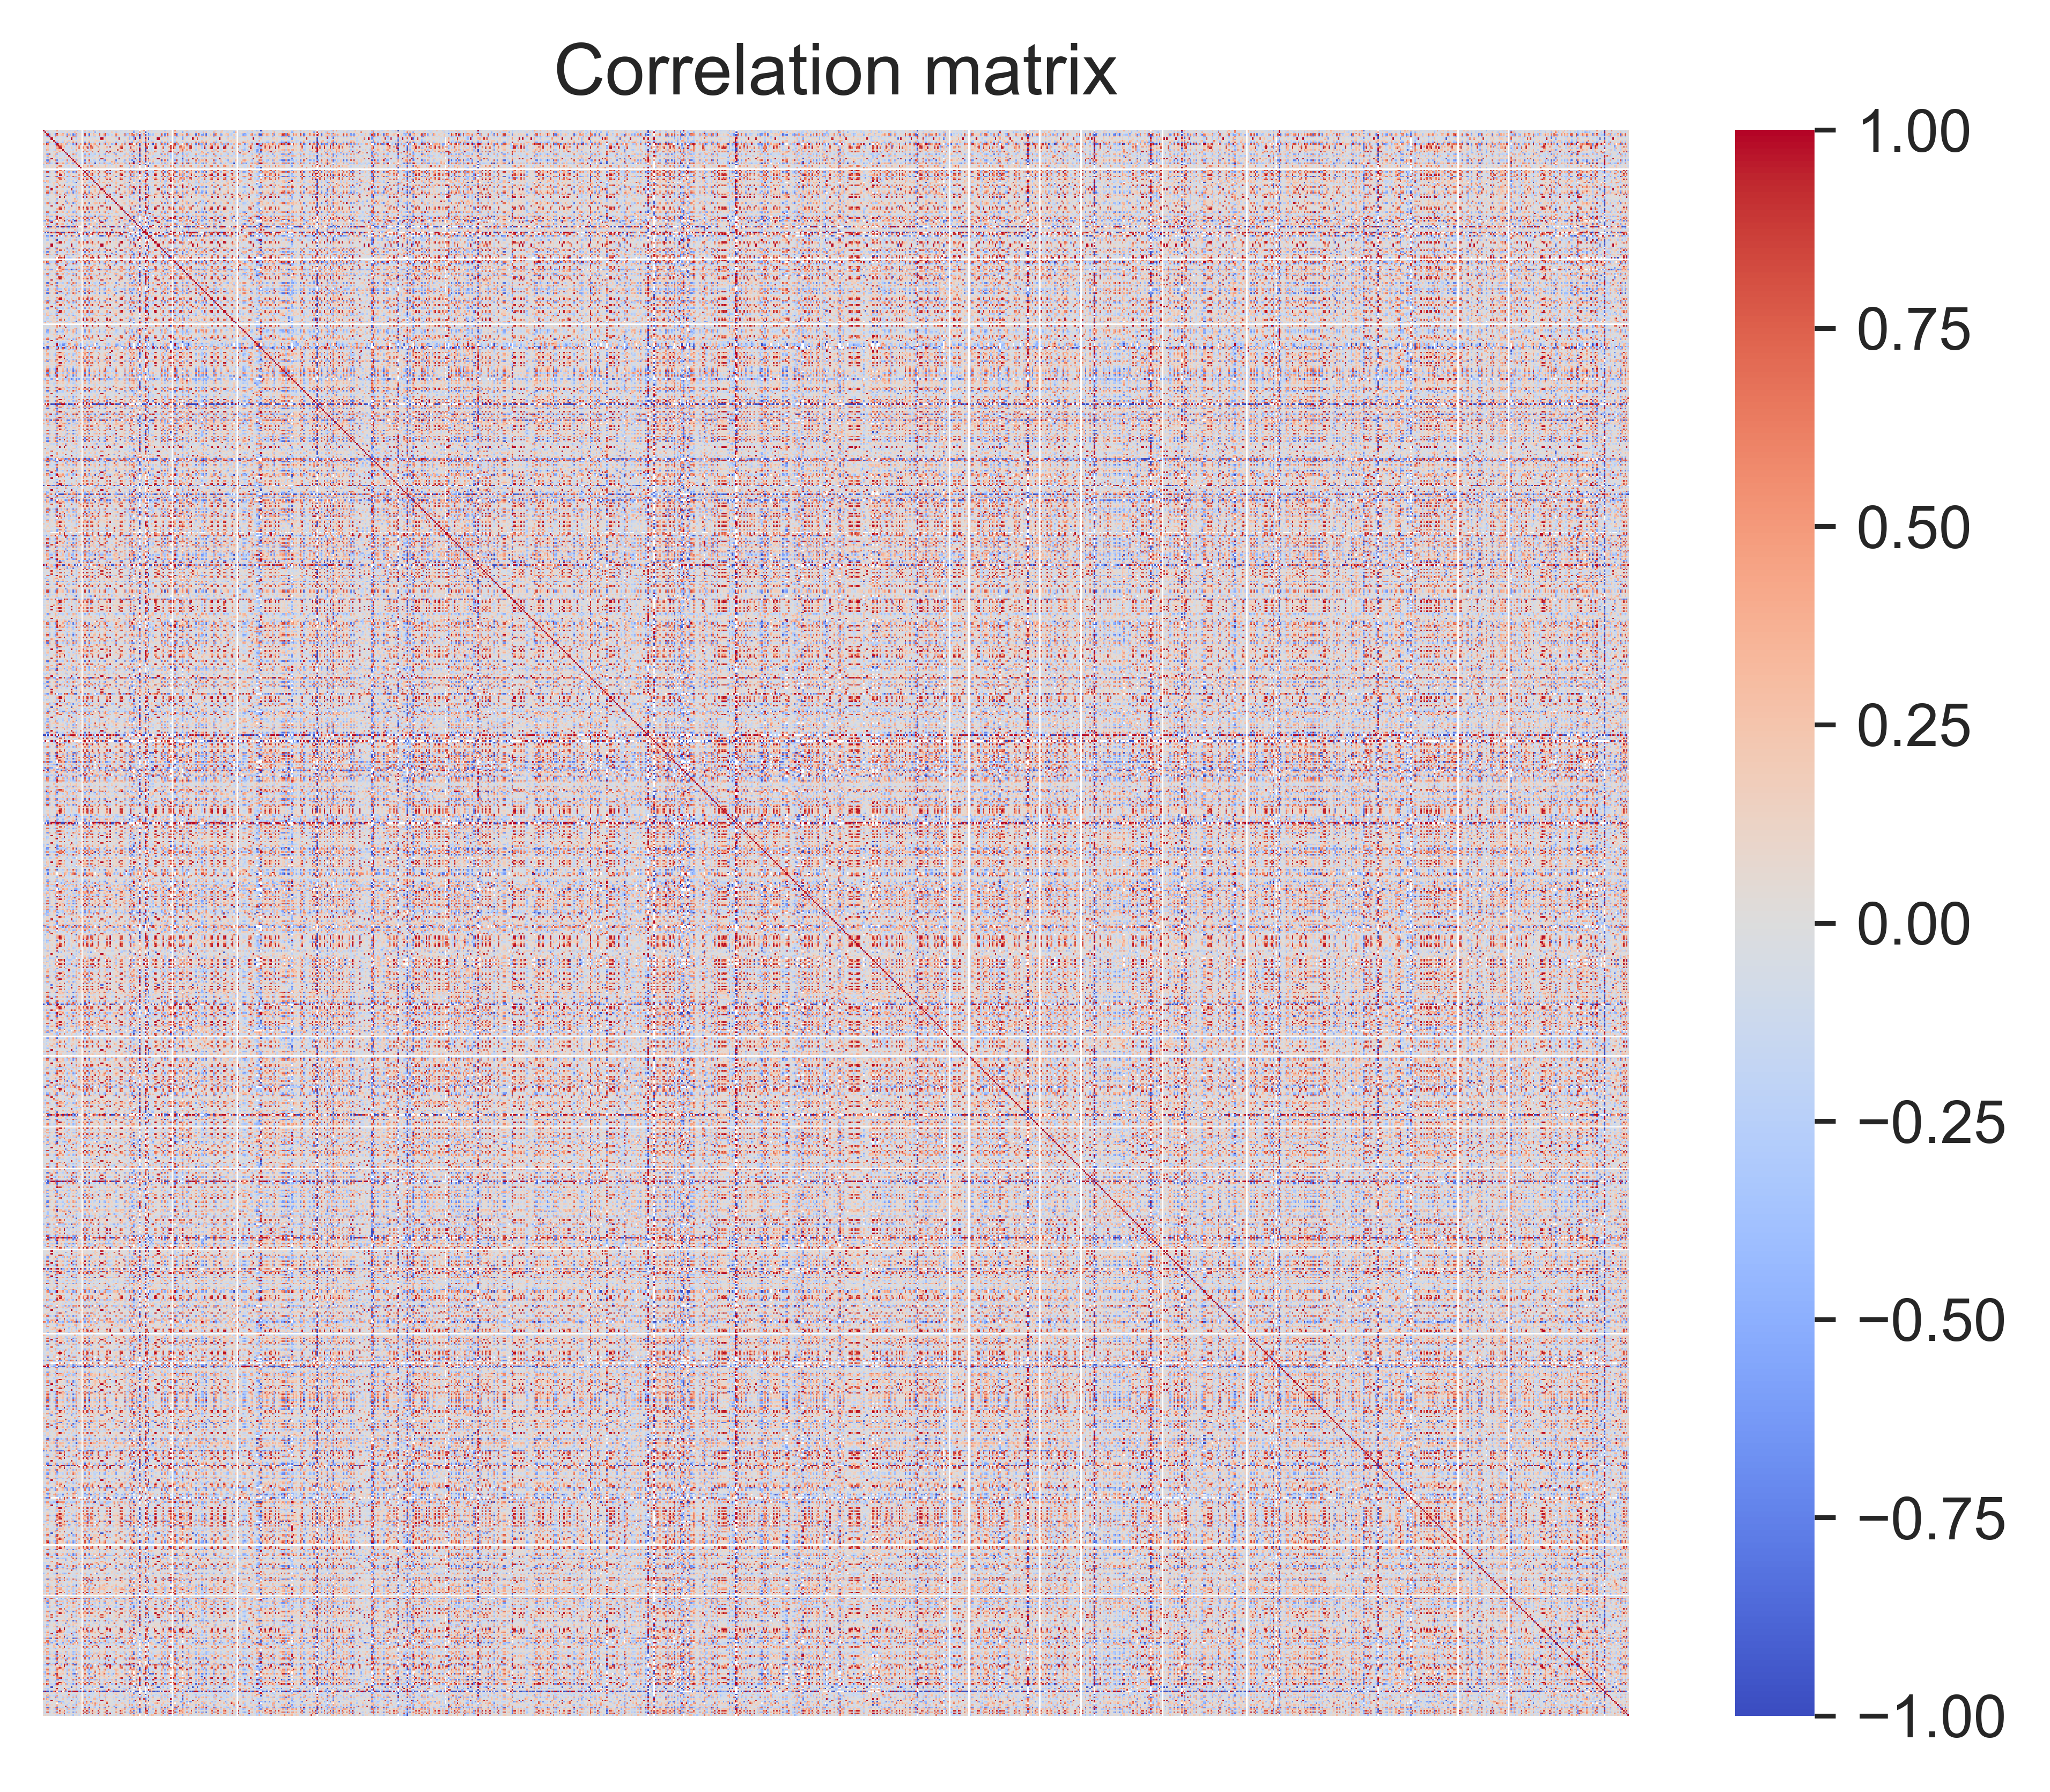

In [8]:
plt.figure(dpi=800)
sns.heatmap(corr, annot=False, cmap='coolwarm', square=True, xticklabels=[], yticklabels=[])
plt.title('Correlation matrix')
plt.savefig('correlation_matrix.png', bbox_inches='tight')
plt.show()

In [9]:
corr = df.corr()

corr.iloc[:,:] = np.tril(corr, k=-1)
corr.values[np.arange(corr.shape[0])[:,None] <= np.arange(corr.shape[0])] = np.nan

corr = corr.stack()
corr = corr[corr != np.nan]

corr

FD.RES.LIQU.AS.ZS  GC.TAX.OTHR.RV.ZS   -0.072527
SE.TER.ENRR        GC.TAX.OTHR.RV.ZS    0.251493
                   FD.RES.LIQU.AS.ZS   -0.102020
SH.H2O.SMDW.ZS     GC.TAX.OTHR.RV.ZS    0.149212
                   FD.RES.LIQU.AS.ZS   -0.283521
                                          ...   
SE.ENR.SECO.FM.ZS  SP.POP.0014.TO.ZS   -0.117801
                   TX.VAL.MANF.ZS.UN    0.134873
                   DT.TDS.DIMF.CD      -0.103374
                   SP.POP.5559.MA.5Y    0.077951
                   DC.DAC.FRAL.CD      -0.220635
Length: 551802, dtype: float64

In [10]:
bins = np.linspace(-1, 1, 21)
counts = np.zeros(len(bins) - 1)

for bin_idx in range(len(bins) - 1):
    counts[bin_idx] = ((corr > bins[bin_idx]) & (corr <= bins[bin_idx + 1])).sum().sum()

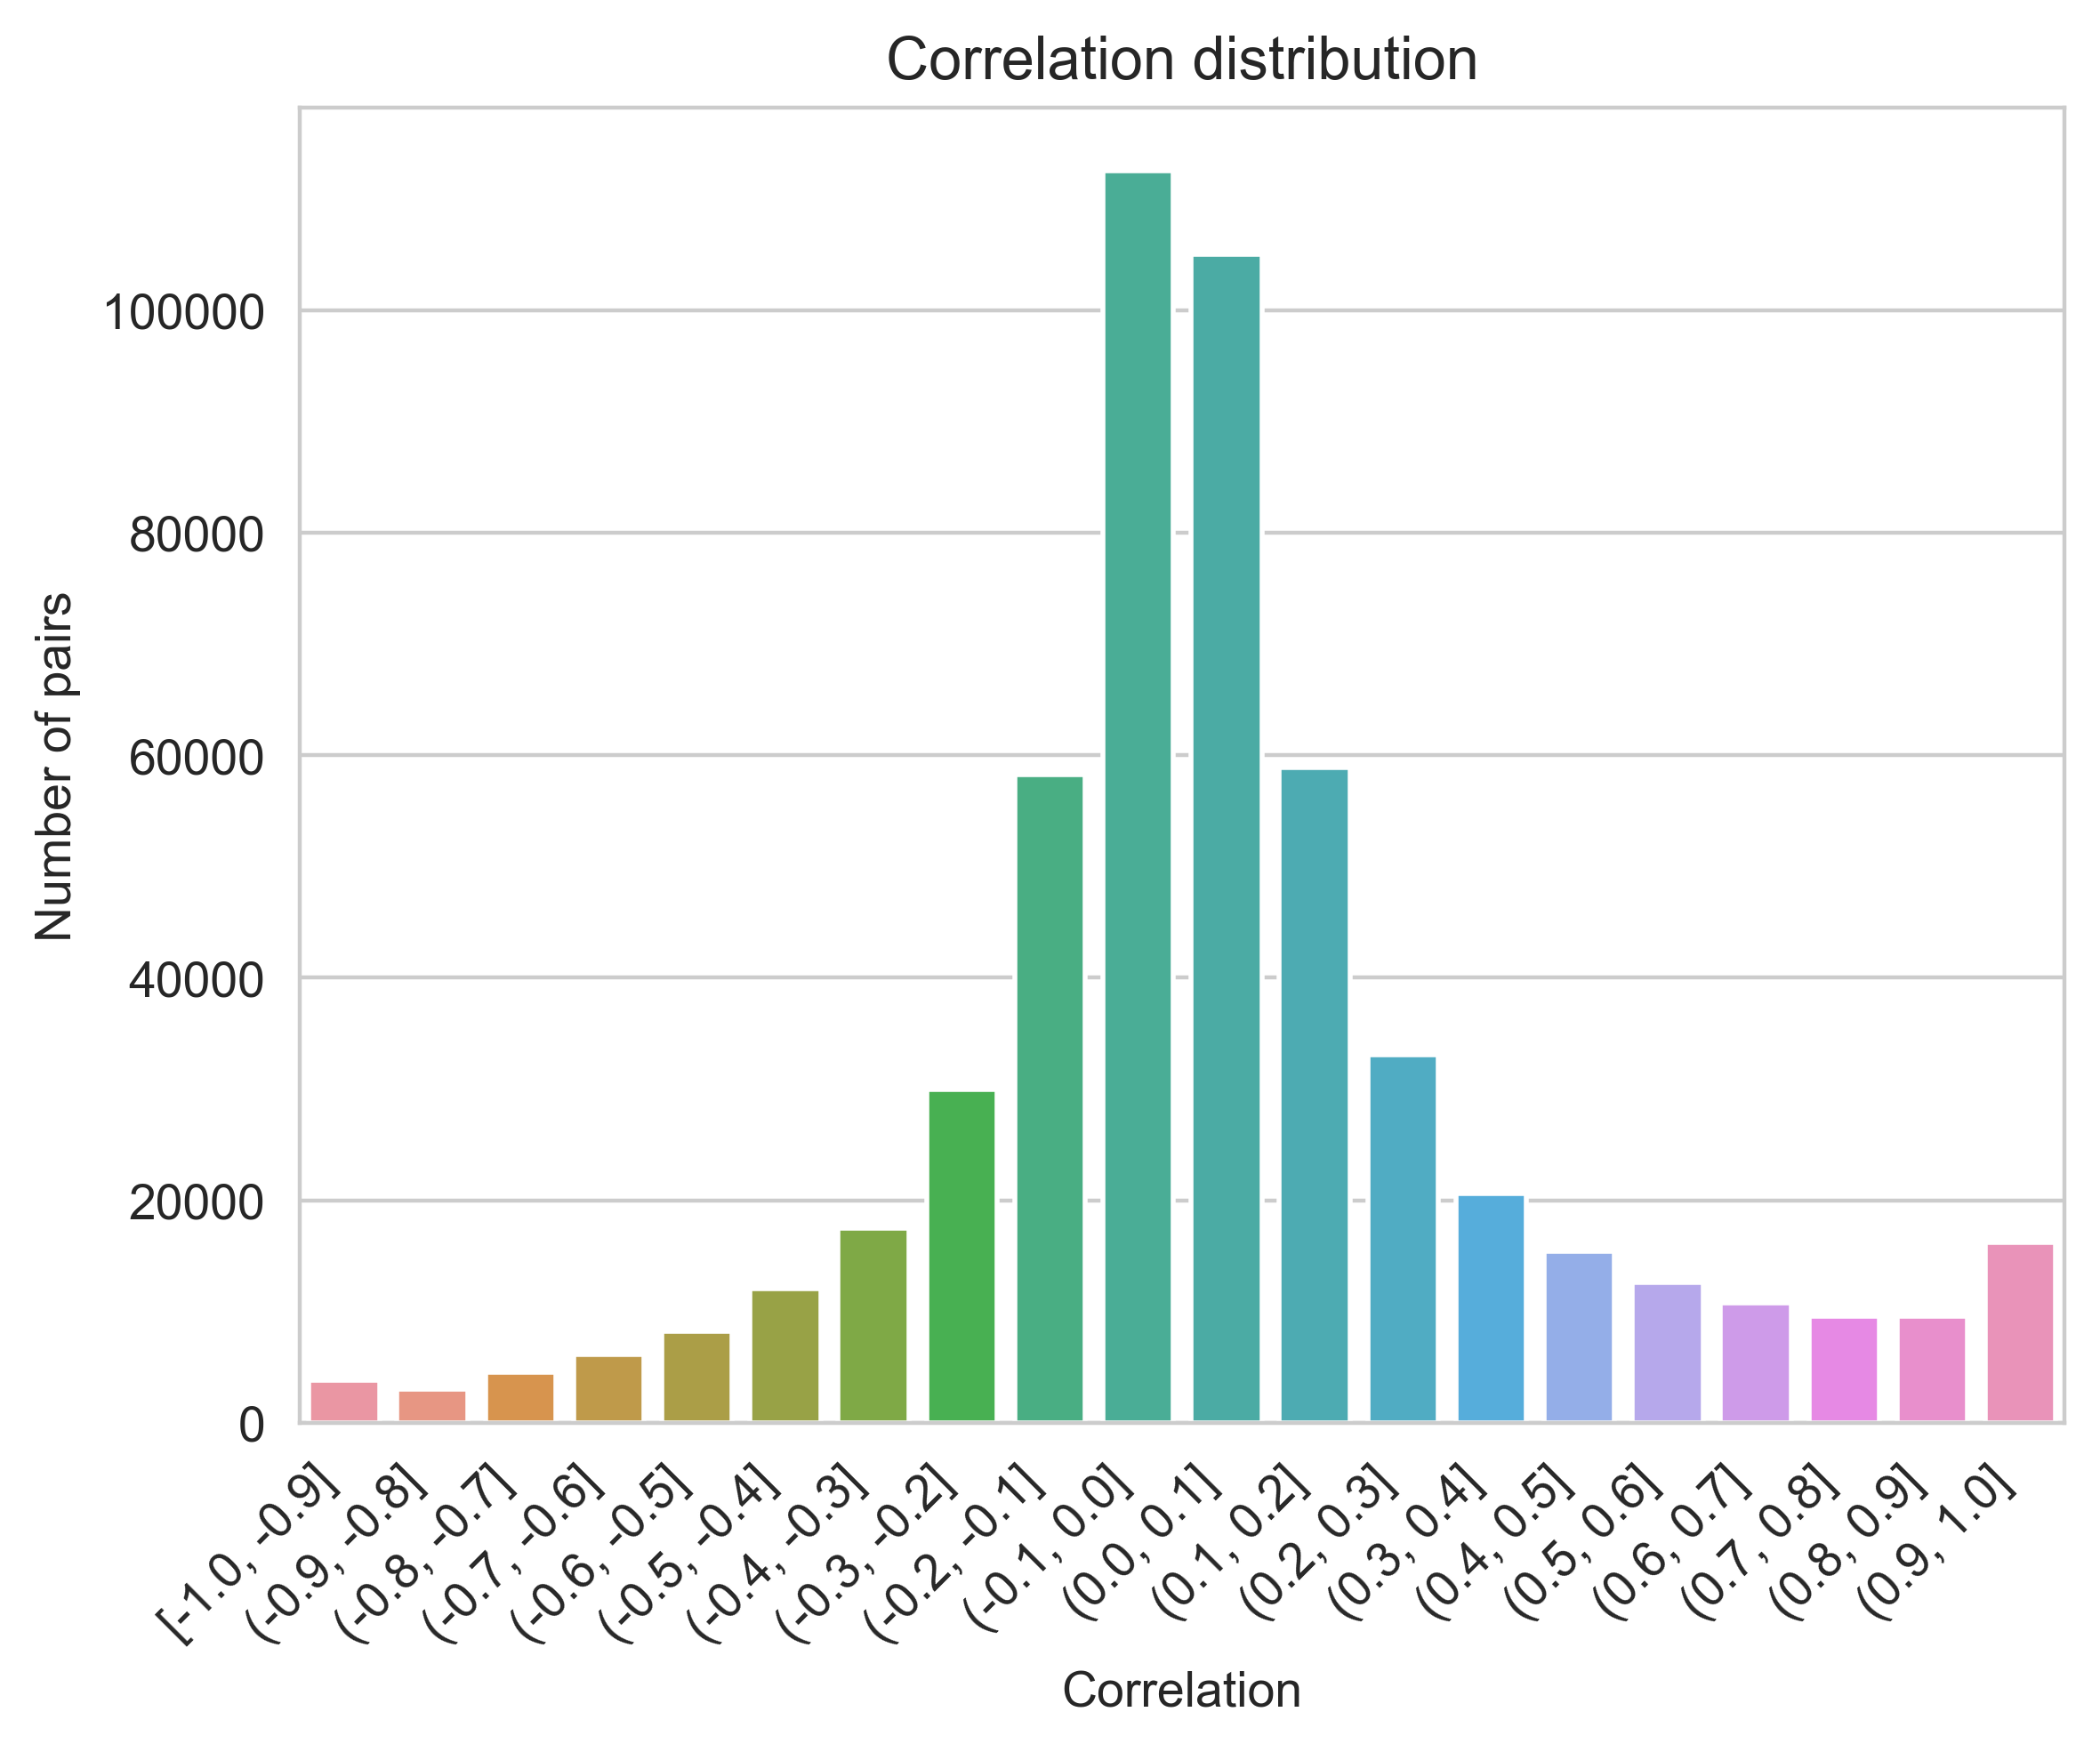

In [11]:
x = list(map(lambda x: f'({x[0]:.1f}, {x[1]:.1f}]', zip(bins, bins[1:])))
x[0] = '[' + x[0][1:]
sns.barplot(x=x, y=counts)
plt.xlabel('Correlation')
plt.ylabel('Number of pairs')
plt.title('Correlation distribution')
plt.xticks(rotation=45, ha='right')
plt.savefig('correlation_distribution.png', bbox_inches='tight')
plt.show()

In [12]:
def print_correlated_cols(c_low, c_high, n_cols=None):
    cols = corr[(corr >= c_low) & (corr <= c_high)].index

    if n_cols is not None:
        cols = cols[:n_cols]

    for c in cols:
        print(f'{series[c[0]]} - {series[c[1]]}')

In [13]:
print_correlated_cols(1, 1, 100)

Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative) - Prevalence of overweight, weight for height, male (% of children under 5)
Women who believe a husband is justified in beating his wife when she refuses sex with him (%) - Adjusted net savings, excluding particulate emission damage (current US$)
Women who believe a husband is justified in beating his wife when she refuses sex with him (%) - Interest rate spread (lending rate minus deposit rate, %)
Women who believe a husband is justified in beating his wife when she refuses sex with him (%) - General government final consumption expenditure (annual % growth)
Women who believe a husband is justified in beating his wife when she refuses sex with him (%) - People with basic handwashing facilities including soap and water (% of population)
Women who believe a husband is justified in beating his wife when she refuses sex with him (%) - Broad money growth (annual %)
Women who believe a husband 

In [14]:
print_correlated_cols(-1, -1, 100)

Women who believe a husband is justified in beating his wife when she refuses sex with him (%) - Households and NPISHs final consumption expenditure: linked series (current LCU)
Women who believe a husband is justified in beating his wife when she refuses sex with him (%) - Prevalence of overweight, weight for height, male (% of children under 5)
Women who believe a husband is justified in beating his wife when she refuses sex with him (%) - International tourism, receipts for passenger transport items (current US$)
Women who believe a husband is justified in beating his wife when she refuses sex with him (%) - Trade (% of GDP)
Women who believe a husband is justified in beating his wife when she refuses sex with him (%) - Gross value added at basic prices (GVA) (constant LCU)
Women who believe a husband is justified in beating his wife when she refuses sex with him (%) - Adults (ages 15-49) newly infected with HIV
Women who believe a husband is justified in beating his wife when she a

In [15]:
print_correlated_cols(-0.01, 0.01, 100)

Households and NPISHs final consumption expenditure: linked series (current LCU) - Other taxes (% of revenue)
Households and NPISHs final consumption expenditure: linked series (current LCU) - Bank liquid reserves to bank assets ratio (%)
Industry (including construction), value added (constant LCU) - Other taxes (% of revenue)
Industry (including construction), value added (constant LCU) - Bank liquid reserves to bank assets ratio (%)
Share of tariff lines with international peaks, manufactured products (%) - Bank liquid reserves to bank assets ratio (%)
Net bilateral aid flows from DAC donors, Ireland (current US$) - Prevalence of overweight, weight for height, male (% of children under 5)
Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate) - Industry (including construction), value added (constant LCU)
Trade (% of GDP) - Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)
Export value index (2000 = 100) - Househol